In [46]:
from selenium import webdriver
from bs4 import BeautifulSoup as bs
from tqdm import tqdm
import os, time
import urllib.request

In [3]:
keyword = '원두'
url1 = 'https://www.google.com/search?sca_esv=5b2e6e9ffdc26326&sxsrf=ACQVn0_htAYdQcw19VUE2vrtjI2RlKBo2g:1709165545509&q='
url2 = '&tbm=isch&source=lnms&sa=X&ved=2ahUKEwiP2s7poc-EAxURslYBHZKACfQQ0pQJegQIDRAB&biw=1920&bih=953&dpr=1'
url = url1 + keyword + url2
print(url)

https://www.google.com/search?sca_esv=5b2e6e9ffdc26326&sxsrf=ACQVn0_htAYdQcw19VUE2vrtjI2RlKBo2g:1709165545509&q=원두&tbm=isch&source=lnms&sa=X&ved=2ahUKEwiP2s7poc-EAxURslYBHZKACfQQ0pQJegQIDRAB&biw=1920&bih=953&dpr=1


In [55]:
driver = webdriver.Chrome('chromedriver.exe')

In [56]:
driver.get(url)

In [13]:
# 스크롤 가장 아래까지 내리기
# execute_script()함수는 java script 명령을 전달한다.
driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")

In [14]:
# 위 코드 5번 실행되면 결과 더 보기가 생성된다.
driver.find_element_by_css_selector('#islmp > div > div > div > div > div.C5Hr4 > div.K414Oe > div.FAGjZe > input').click()

In [20]:
# 추가로 6번 실행 되니 결과가 끝남. 검색어에 따라 다르다.
driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")

In [ ]:
html = driver.page_source
soup = bs(html, 'html.parser')
soup

[<div class="isv-r PNCib ViTmJb BUooTd" data-cb="0" data-cl="0" data-cr="0" data-ct="0" data-hveid="CAEQbg" data-ictx="1" data-id="cekPUIebj_d31M" data-oh="422" data-os="-2" data-ow="750" data-ri="0" data-sc="1" data-tbnid="cekPUIebj_d31M" data-tw="299" data-ved="2ahUKEwiYpfePpc-EAxVsevUHHZrFD20QMygAegQIARBu" jsaction="TMn9y:cJhY7b;;cFWHmd:s370ud;" jscontroller="dPOyed" jsmodel="cj77d  cj77d" jsname="N9Xkfe" role="listitem" style="width: 299px; height: 222px;"><h3 class="bytUYc">1천원대 커피 사라질 듯 - 트레드링스 블로그</h3><a class="FRuiCf islib nfEiy" data-nav="1" jsaction="J9iaEb;mousedown:npT2md; touchstart:npT2md;" jsname="sTFXNd" role="button" style="height: 180px;" tabindex="0"><div class="fR600b islir" jsname="DeysSe" style="height: 169px; margin-top: 6px;"><img alt="1천원대 커피 사라질 듯 - 트레드링스 블로그" class="rg_i Q4LuWd" data-atf="true" data-deferred="1" data-iml="1041.2000000476837" height="169" jsname="Q4LuWd" src="" width="299"/></div><div class="Dv4WMb mvjhOe"></div></a><a aria-label="트레드링스1천원대 커피
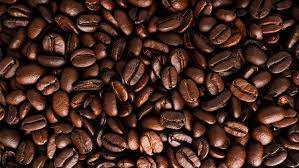
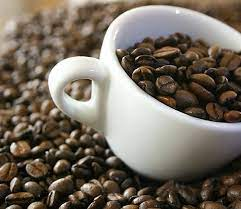
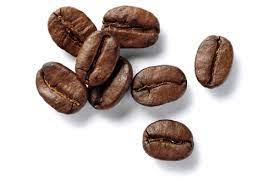
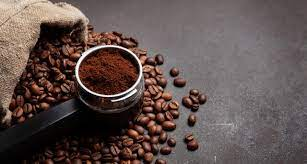
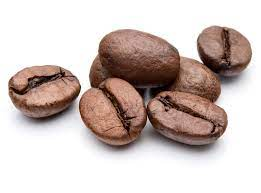
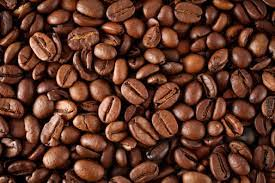
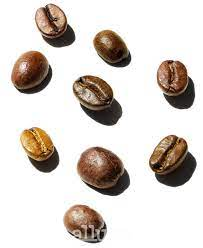
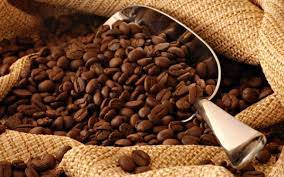
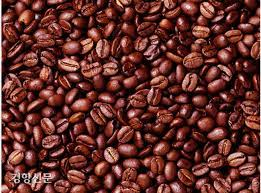
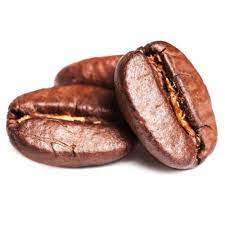

In [23]:
soup.find_all('div', class_='isv-r')[:10]



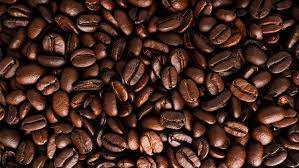

In [28]:
print(soup.find_all('div', class_='isv-r')[0].find('img')['src'])

In [29]:
imgTagLst = soup.find_all('div', class_='isv-r')

In [36]:
imgLinkLst = []
for tag in imgTagLst:
    try:
        imgLinkLst.append(tag.find('img')['src'])
    except:
        imgLinkLst.append(tag.find('img')['data-src'])

In [35]:
tag.find('img')['data-src']

'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQccAn3atuo23tPzIav-8ox6Tk4eXfS_t4MEQ&usqp=CAU'

In [38]:
len(imgLinkLst)

941

''
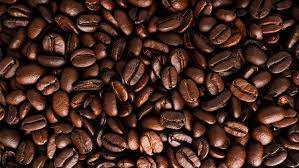

In [39]:
imgLinkLst[0]

In [47]:
# 이미지 저장 함수
urllib.request.urlretrieve(imgLinkLst[0], 'C:/py_data/원두.jpg')

('C:/py_data/원두.jpg', <email.message.Message at 0x1cbbacb23e0>)

In [48]:
os.makedirs('c:/py_data/구글원두이미지')

In [49]:
# 같은 이름이 중복된 폴더를 생성하면 오류 발생
os.makedirs('c:/py_data/구글원두이미지')

FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'c:/py_data/구글원두이미지'

In [52]:
fDir = 'C:/py_data/'
fNames = os.listdir(fDir)

dirName = keyword + '0'
cnt = 0

while 1:
    if dirName not in fNames:
        os.makedirs(fDir + dirName)
        break
    cnt += 1
    dirName = keyword + str(cnt)
print(f'폴더 {dirName}이 생성되었습니다.')


폴더 원두2이 생성되었습니다.


In [53]:
dirName

'원두2'

In [54]:
imgCnt = 0
for imgURL in tqdm(imgLinkLst, desc = '저장중...'):
    tempFname = fDir + dirName + '/' + keyword + str(imgCnt) + '.jpg'
    urllib.request.urlretrieve(imgURL, tempFname)
    imgCnt += 1

driver.close()

저장중...: 100%|██████████| 941/941 [02:54<00:00,  5.40it/s]


WebDriverException: Message: disconnected: not connected to DevTools
  (failed to check if window was closed: disconnected: not connected to DevTools)
  (Session info: chrome=122.0.6261.95)
  (Driver info: chromedriver=122.0.6261.94 (880dbf29479c6152d5e4f08dfd3a96b30f919e56-refs/branch-heads/6261@{#960}),platform=Windows NT 10.0.19045 x86_64)
